In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optuna
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn.manifold import TSNE
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

In [4]:
dataset = pd.read_csv("Processed_dataset.csv")

In [5]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### PCA

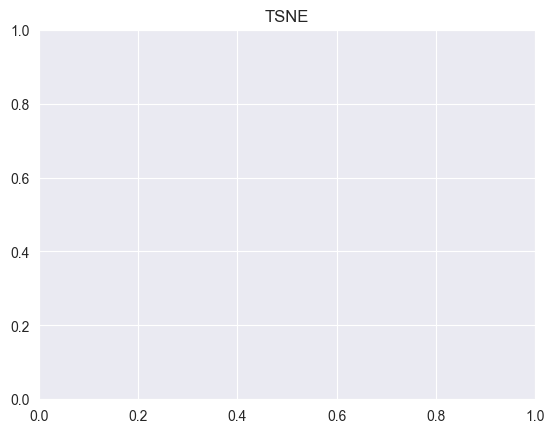

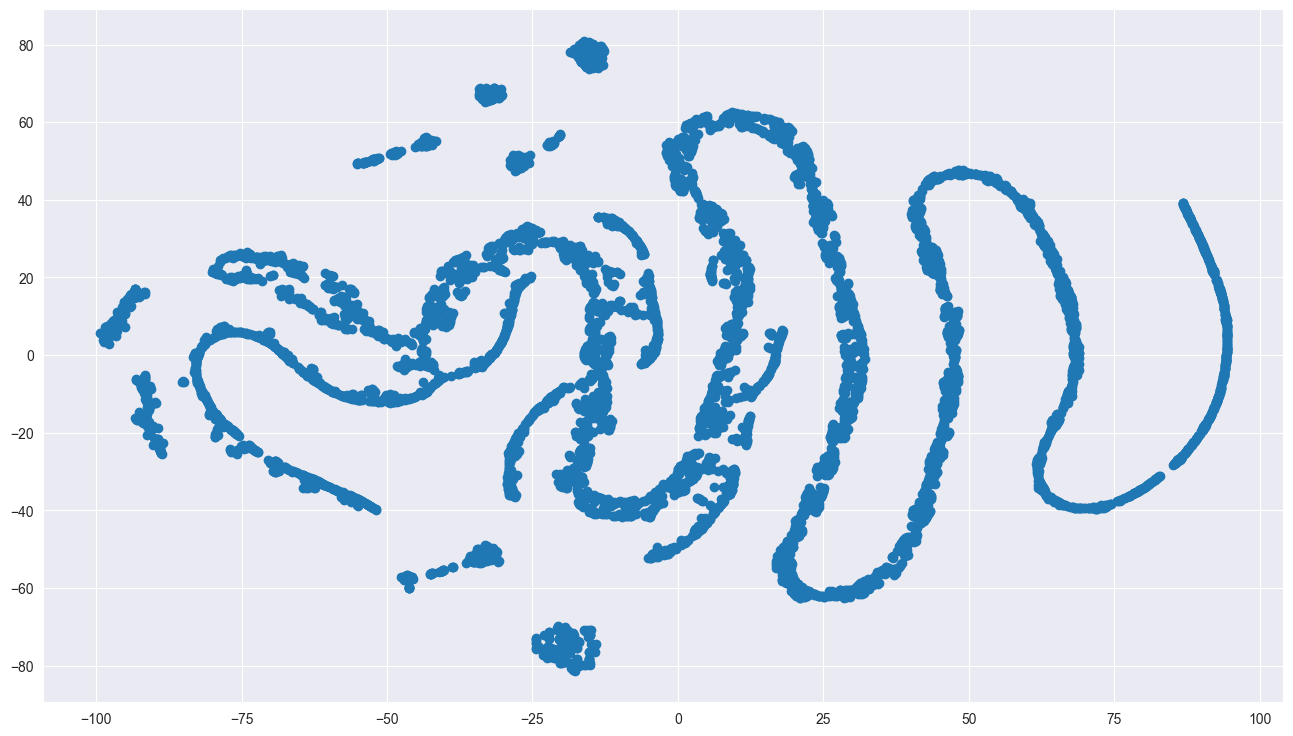

In [6]:
projection = TSNE(n_components=2).fit_transform(dataset)
plt.title("TSNE")
plt.figure(figsize=(16,9))
plt.scatter(projection[:,0], projection[:,1])

In [7]:
brch = Birch(threshold=31.715912648349962, branching_factor=200, n_clusters=4)
centers = Birch(threshold=31, branching_factor=200, n_clusters=4)

In [8]:
brch.fit(projection)
centers.fit(projection)

Birch(branching_factor=200, n_clusters=4, threshold=31)

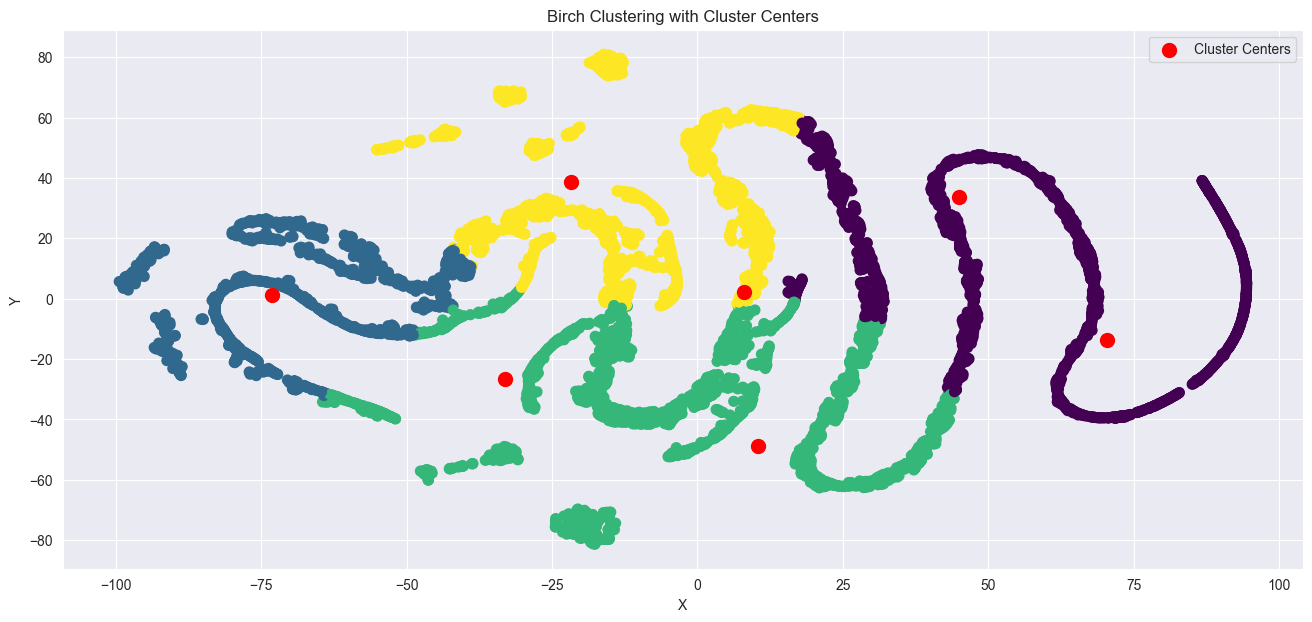

In [9]:
plt.figure(figsize=(16,7))
plt.scatter(projection[:, 0], projection[:, 1], c=brch.labels_, cmap='viridis', s=50, alpha=1)
plt.scatter(centers.subcluster_centers_[:, 0], centers.subcluster_centers_[:, 1], c='red', s=100, marker='o', label='Cluster Centers')
plt.title('Birch Clustering with Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

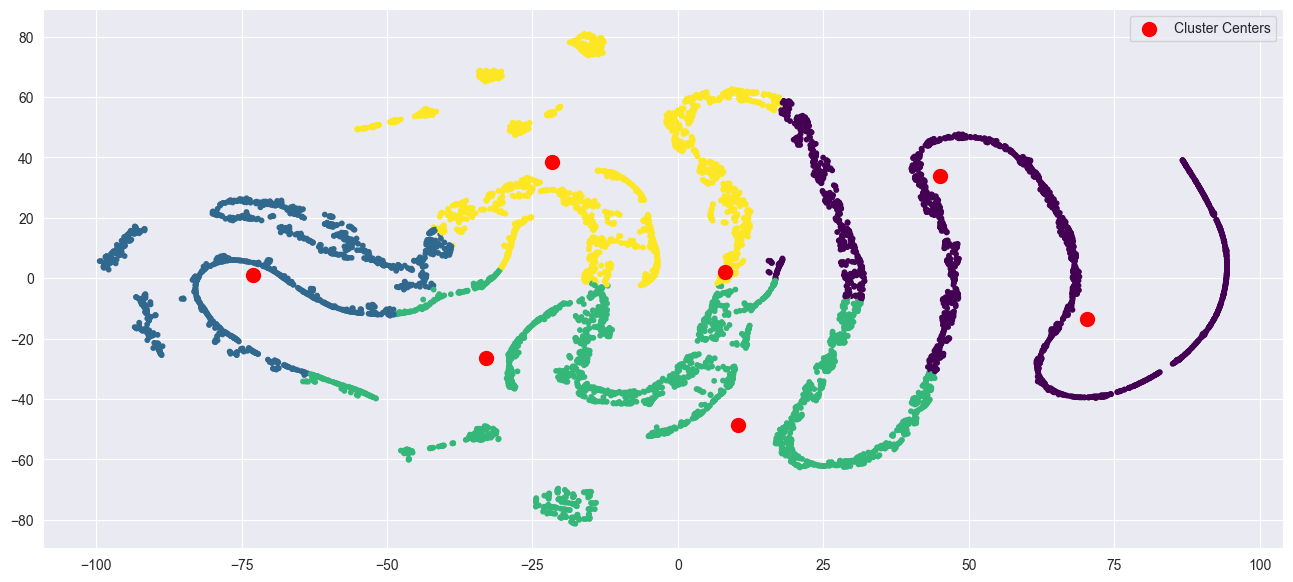

In [10]:
plt.figure(figsize=(16,7))
plt.scatter(projection[:, 0], projection[:, 1], c=brch.labels_, cmap='viridis', s=10, alpha=1)
plt.scatter(centers.subcluster_centers_[:, 0],centers.subcluster_centers_[:, 1], c='red', s=100, marker='o', label='Cluster Centers')
plt.legend()
plt.show()

Davies Bouldin indeksi 0 ile +sonsuz arasında değer alır. Sonuçlar 0'a yakınlaştıkça daha iyi çıktı verir.
Silhouette indeksi -1 ile 1 arasında değer alır. Sonuçlar 1'e yakınlaştıkça daha iyi bir çıktı verir.

### Best results obtained at 4 clusters.

In [11]:
from sklearn import metrics
for i in range(4,15):
    birch = Birch(threshold=2.715912648349962, branching_factor=145, n_clusters=i)
    labels = birch.fit_predict(dataset)     
    print("Silhouette score for {} clusters Birch: {} ".format(i,metrics.silhouette_score(dataset,labels, metric='euclidean').round(3)))
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(dataset,labels).round(3)))

Silhouette score for 4 clusters Birch: 0.586 
Davies Bouldin Score:0.496
Silhouette score for 5 clusters Birch: 0.511 
Davies Bouldin Score:0.506
Silhouette score for 6 clusters Birch: 0.525 
Davies Bouldin Score:0.494
Silhouette score for 7 clusters Birch: 0.556 
Davies Bouldin Score:0.504
Silhouette score for 8 clusters Birch: 0.571 
Davies Bouldin Score:0.504
Silhouette score for 9 clusters Birch: 0.567 
Davies Bouldin Score:0.509
Silhouette score for 10 clusters Birch: 0.514 
Davies Bouldin Score:0.513
Silhouette score for 11 clusters Birch: 0.512 
Davies Bouldin Score:0.516
Silhouette score for 12 clusters Birch: 0.503 
Davies Bouldin Score:0.514
Silhouette score for 13 clusters Birch: 0.504 
Davies Bouldin Score:0.511
Silhouette score for 14 clusters Birch: 0.508 
Davies Bouldin Score:0.518


In [12]:
# Best params: {'branching_factor': 200, 'n_clusters': 4, 'threshold': 40.228170152165376}
birch = Birch(threshold=51.44796950311999, branching_factor=200, n_clusters=4)
labels = birch.fit_predict(dataset)     
print("Silhouette score for {} clusters Birch: {} ".format(4,metrics.silhouette_score(dataset,labels, metric='euclidean').round(3)))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(dataset,labels).round(3)))

Silhouette score for 4 clusters Birch: 0.63 
Davies Bouldin Score:0.476


# Making optimized factors
## Current Best params: {'branching_factor': 200, 'n_clusters': 4, 'threshold': 51.44796950311999}

In [13]:
def with_actual_dataset(trial):
    branching_factor = trial.suggest_int('branching_factor', 5, 200)
    clusterCount = trial.suggest_int('n_clusters', 4, 12)
    threshold = trial.suggest_float('threshold', 0.1, 100.0)
    
    model = Birch(branching_factor=branching_factor, threshold=threshold, n_clusters=clusterCount)
    clusters = model.fit_predict(dataset)
    
    silhouette_avg = silhouette_score(dataset, clusters)
    return silhouette_avg

def with_normalized_dataset(trial):
    branching_factor = trial.suggest_int('branching_factor', 50, 200)
    clusterCount = trial.suggest_int('n_clusters', 4, 10)
    threshold = trial.suggest_float('threshold', 0.01, 2)
    
    model = Birch(branching_factor=branching_factor, threshold=threshold, n_clusters=clusterCount)
    clusters = model.fit_predict(normalized_dataset)
    silhouette_avg = silhouette_score(normalized_dataset, clusters)
    return silhouette_avg

In [14]:
study = optuna.create_study(direction='maximize')
study.optimize(with_actual_dataset, n_trials=10)
best_params = study.best_params
best_value = study.best_value
print("Best params:", best_params, "Best Value:", best_value)

[I 2024-05-16 14:38:10,948] A new study created in memory with name: no-name-6c4e85db-ec9b-4b6d-8266-93c86082beb9
[I 2024-05-16 14:38:11,475] Trial 0 finished with value: 0.5145924506512433 and parameters: {'branching_factor': 146, 'n_clusters': 9, 'threshold': 11.414906401265736}. Best is trial 0 with value: 0.5145924506512433.
[I 2024-05-16 14:38:11,961] Trial 1 finished with value: 0.5500246918652725 and parameters: {'branching_factor': 108, 'n_clusters': 8, 'threshold': 19.938045143649518}. Best is trial 1 with value: 0.5500246918652725.
[I 2024-05-16 14:38:12,414] Trial 2 finished with value: 0.5389611862020064 and parameters: {'branching_factor': 80, 'n_clusters': 8, 'threshold': 56.61707801701308}. Best is trial 1 with value: 0.5500246918652725.
[I 2024-05-16 14:38:12,888] Trial 3 finished with value: 0.596767074133432 and parameters: {'branching_factor': 155, 'n_clusters': 5, 'threshold': 75.91279672095914}. Best is trial 3 with value: 0.596767074133432.
[I 2024-05-16 14:38:13,

Best params: {'branching_factor': 155, 'n_clusters': 5, 'threshold': 75.91279672095914} Best Value: 0.596767074133432


### Normalizing the dataset

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_dataset = scaler.fit_transform(dataset)
normalized_dataset = pd.DataFrame(normalized_dataset, columns=dataset.columns)
normalized_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.0,1.0,1.0,0.323944,1.0,1.0,0.662189,0.227521,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.845274,0.847461,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,1.0,1.0,0.140845,0.0,1.0,0.112935,0.037809,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,1.0,0.0,0.042254,1.0,1.0,0.558706,0.033210,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


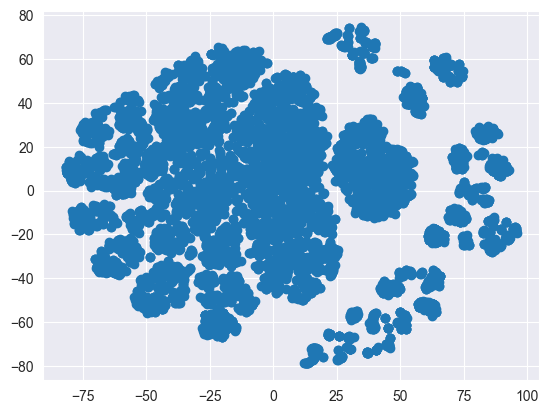

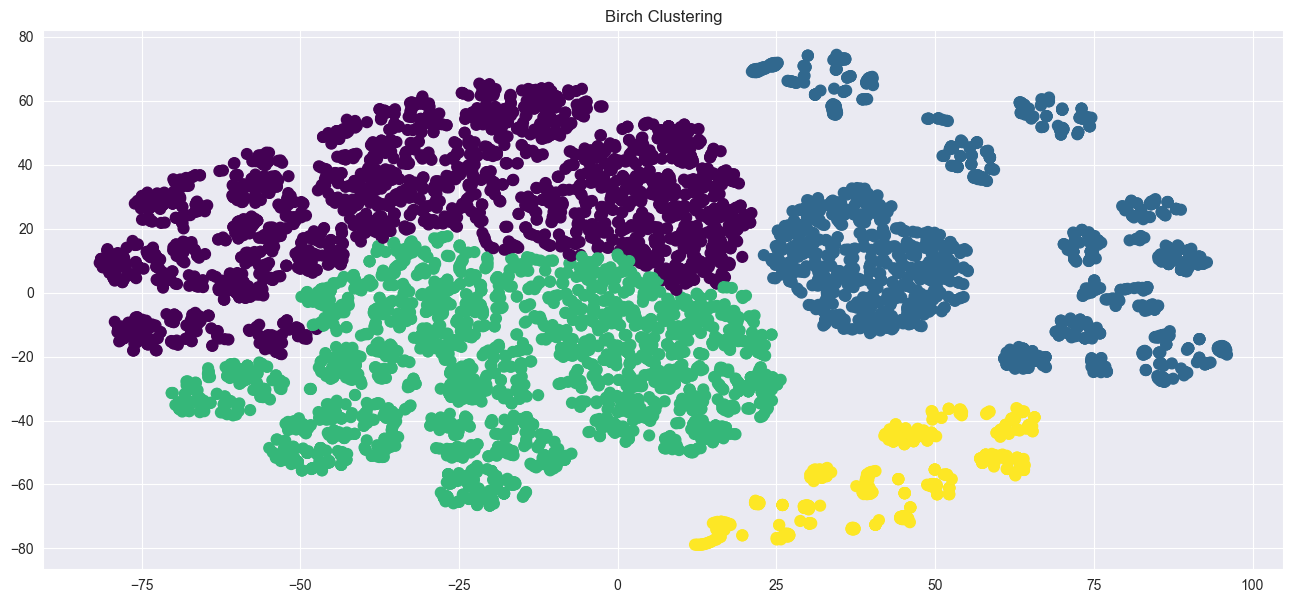

In [16]:
projection = TSNE(n_components=2).fit_transform(normalized_dataset)
plt.scatter(projection[:, 0], projection[:, 1])
brch = Birch(threshold=2.715912648349962, branching_factor=145, n_clusters=4)
brch.fit(projection)
plt.figure(figsize=(16, 7))
plt.scatter(projection[:, 0], projection[:, 1], c=brch.labels_, cmap='viridis', s=60, alpha=1)
plt.title('Birch Clustering')
plt.show()

# Optimize with normalized dataset

### branching_factor: 50
### threshold: 0.7448794990386168
### n_clusters: 4

In [17]:
study = optuna.create_study(direction='maximize')
study.optimize(with_normalized_dataset, n_trials=10)
best_params = study.best_params
best_value = study.best_value
print("Best params:", best_params, "Best Value:", best_value)

[I 2024-05-16 14:38:27,791] A new study created in memory with name: no-name-ac40fdcf-883f-4b22-9afe-413c0d762646
[I 2024-05-16 14:38:28,866] Trial 0 finished with value: 0.14589672724607536 and parameters: {'branching_factor': 194, 'n_clusters': 7, 'threshold': 0.4336105302794755}. Best is trial 0 with value: 0.14589672724607536.
[I 2024-05-16 14:38:29,529] Trial 1 finished with value: 0.14152743368475754 and parameters: {'branching_factor': 100, 'n_clusters': 10, 'threshold': 1.0699513176541113}. Best is trial 0 with value: 0.14589672724607536.
[I 2024-05-16 14:38:30,200] Trial 2 finished with value: 0.162603515630741 and parameters: {'branching_factor': 182, 'n_clusters': 5, 'threshold': 0.9647445641077629}. Best is trial 2 with value: 0.162603515630741.
[I 2024-05-16 14:38:30,690] Trial 3 finished with value: 0.1386000637899979 and parameters: {'branching_factor': 50, 'n_clusters': 8, 'threshold': 1.598161402355252}. Best is trial 2 with value: 0.162603515630741.
[I 2024-05-16 14:3

Best params: {'branching_factor': 182, 'n_clusters': 5, 'threshold': 0.9647445641077629} Best Value: 0.162603515630741


In [18]:
cluster1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
for i in range(len(dataset)):
    if birch.labels_[i] == 0:
        cluster1.append(i)
    elif birch.labels_[i] == 1:
        cluster_2.append(i)
    elif birch.labels_[i] == 2:
        cluster_3.append(i)
    elif birch.labels_[i] == 3:
        cluster_4.append(i)

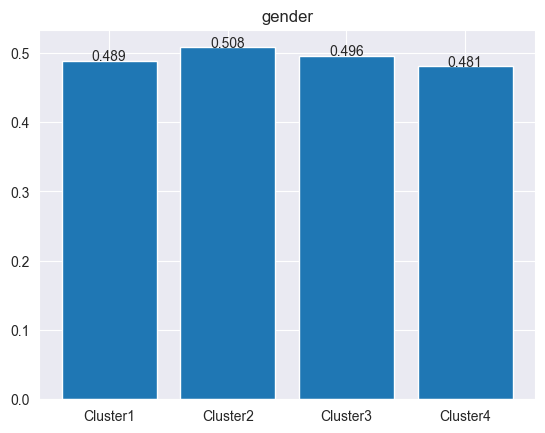

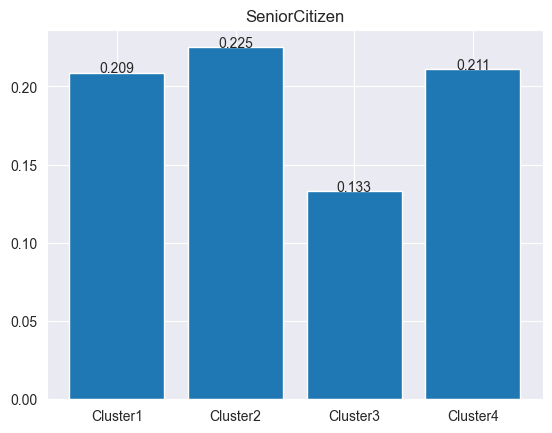

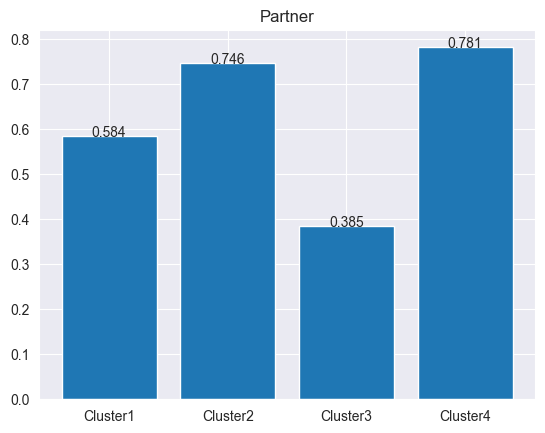

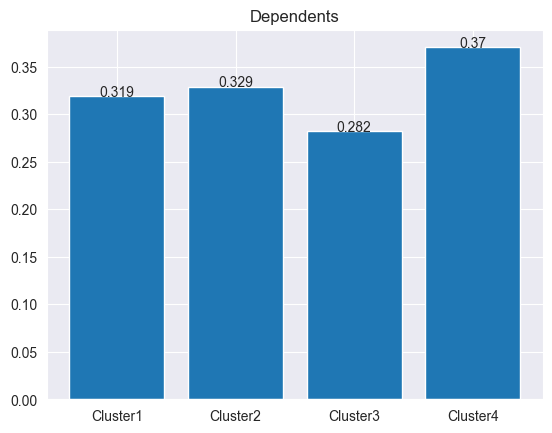

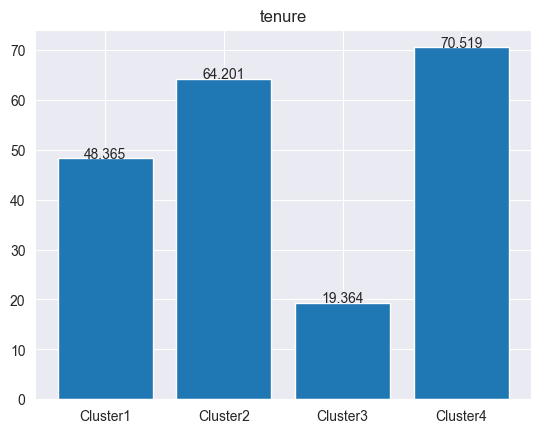

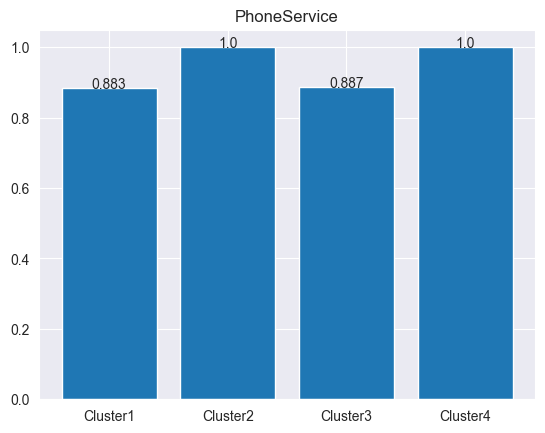

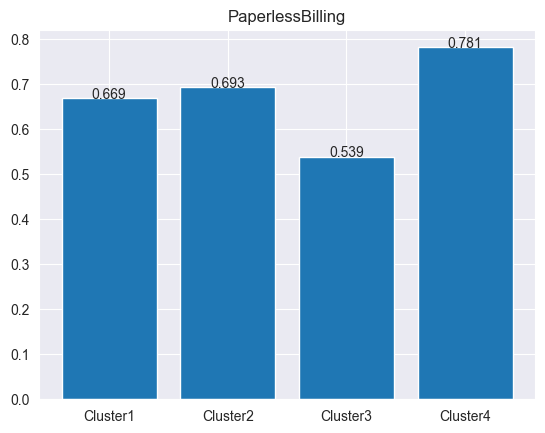

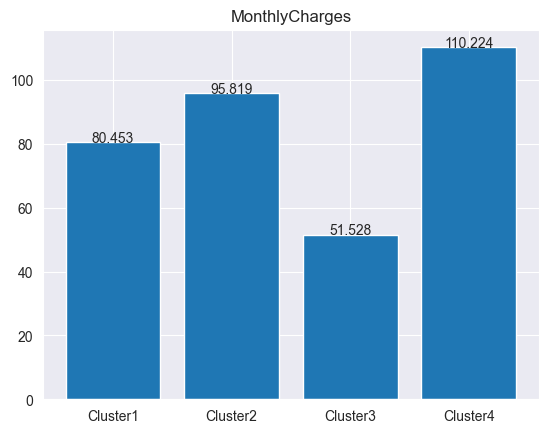

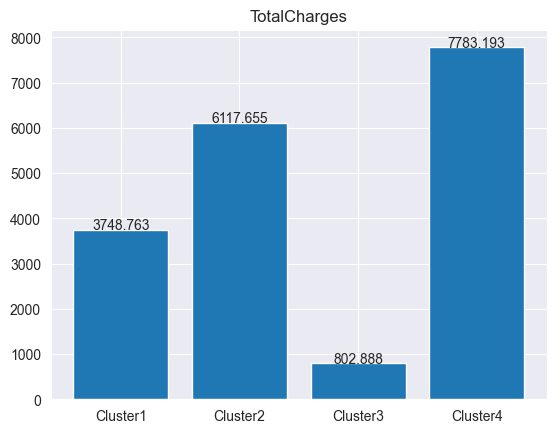

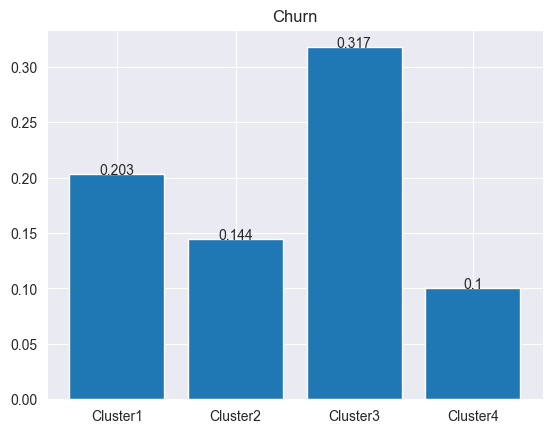

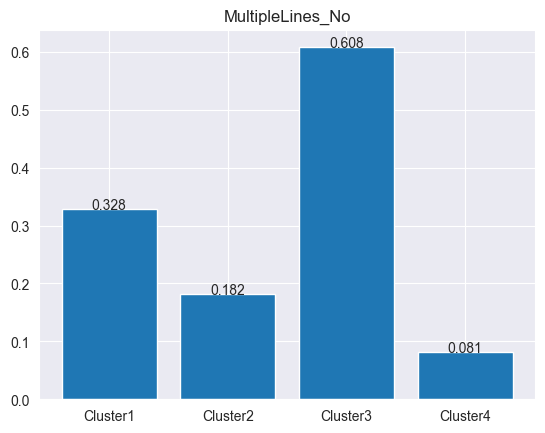

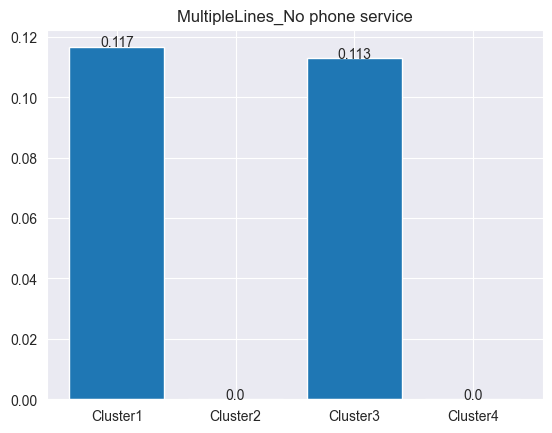

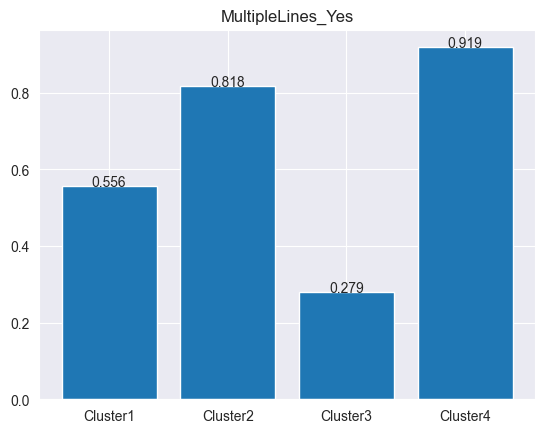

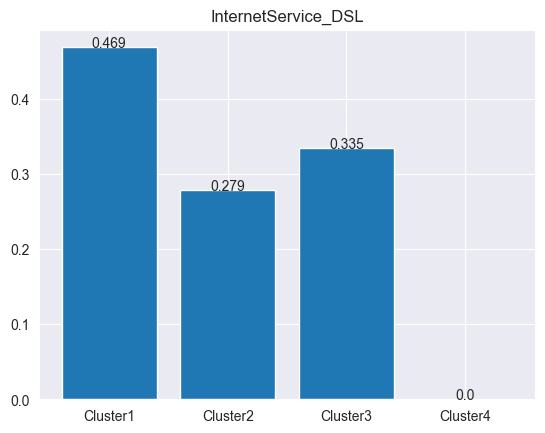

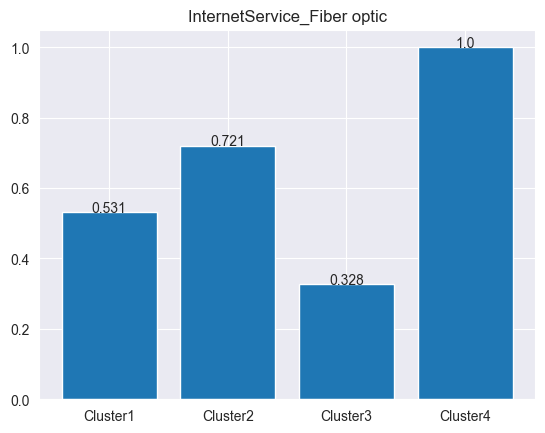

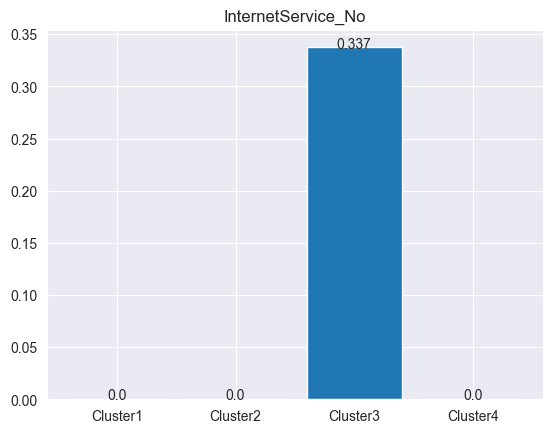

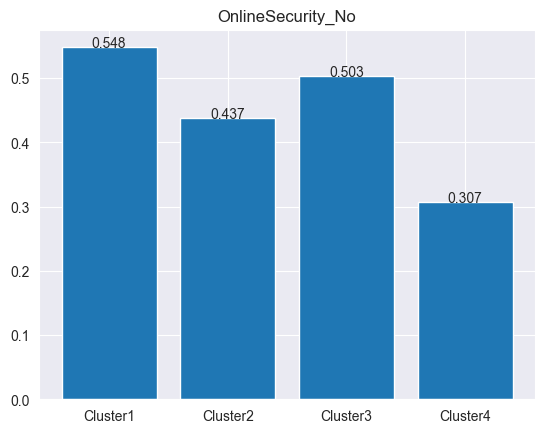

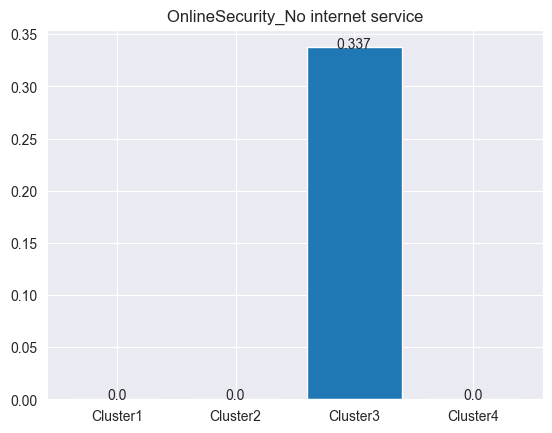

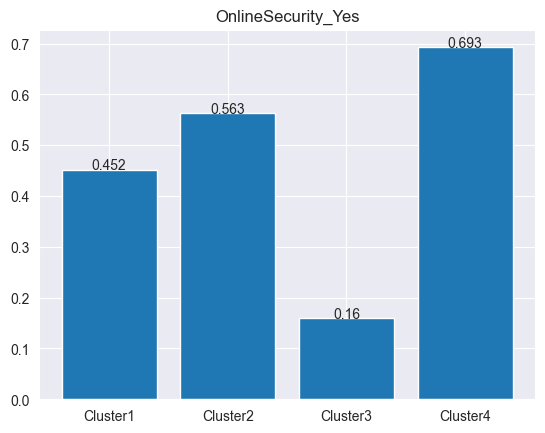

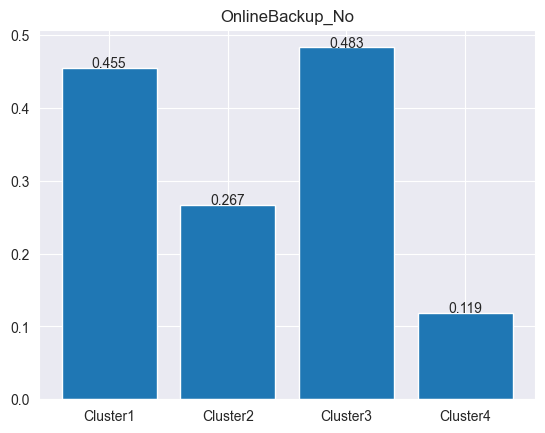

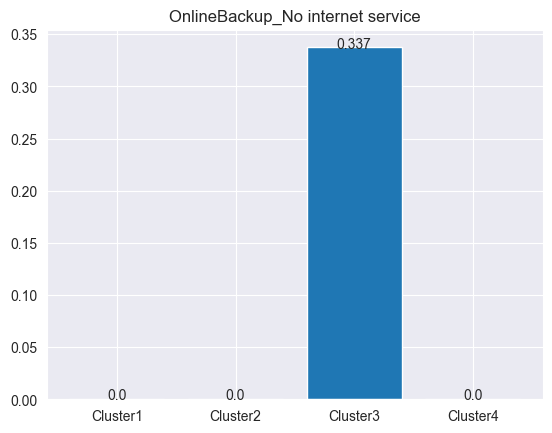

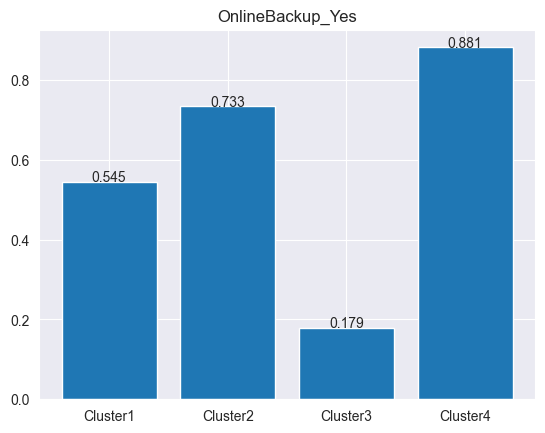

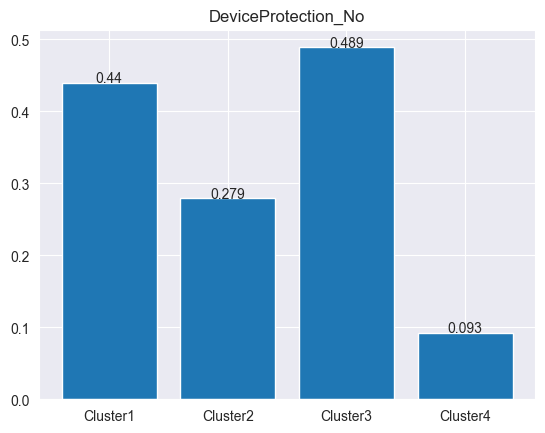

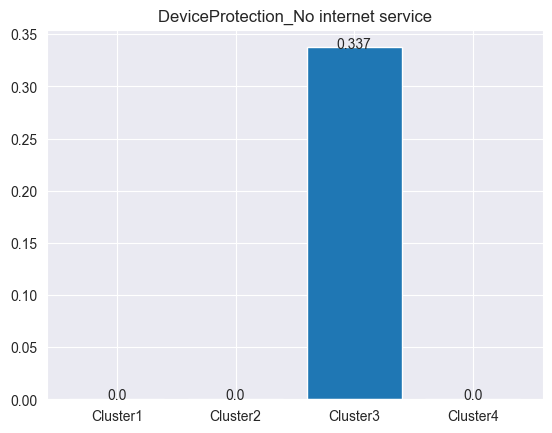

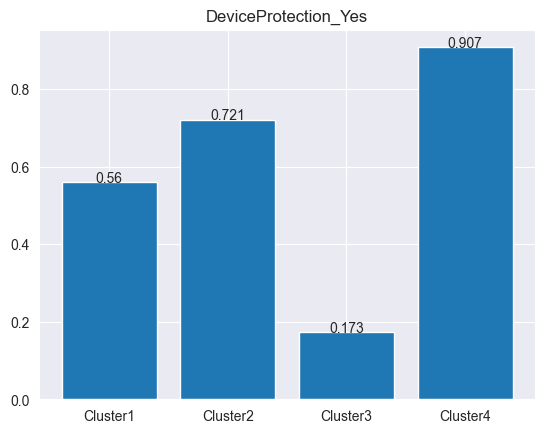

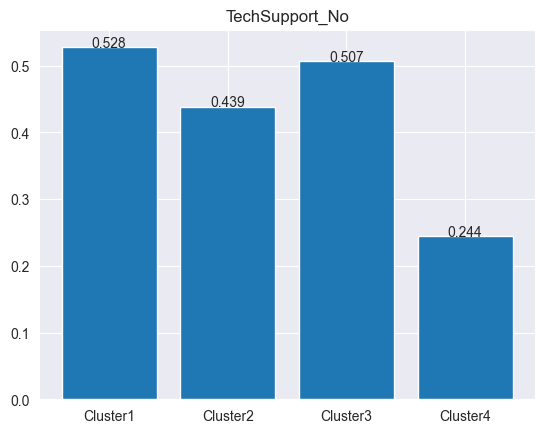

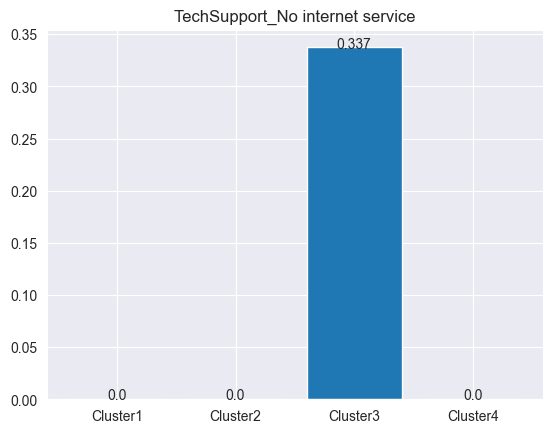

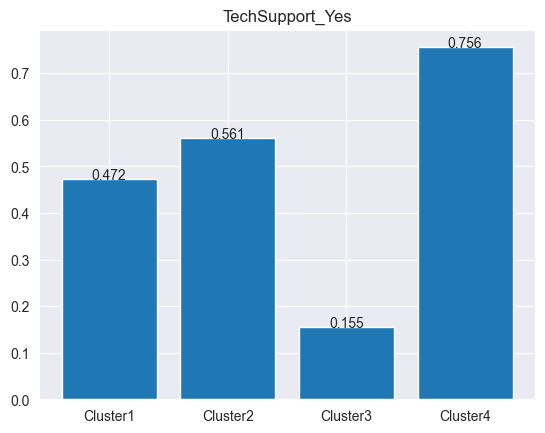

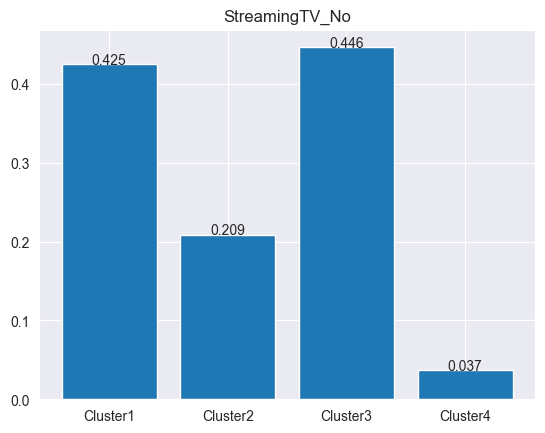

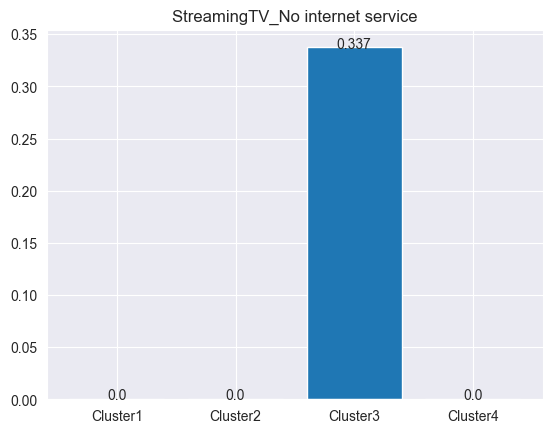

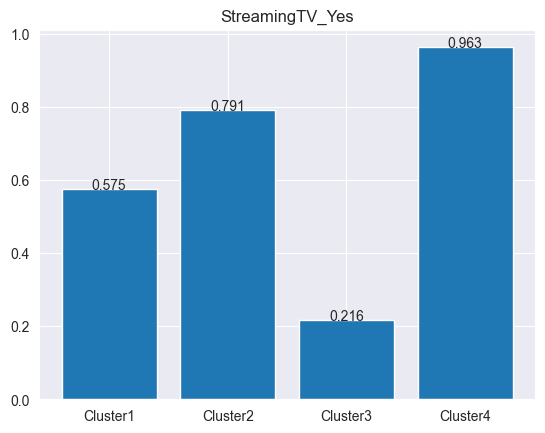

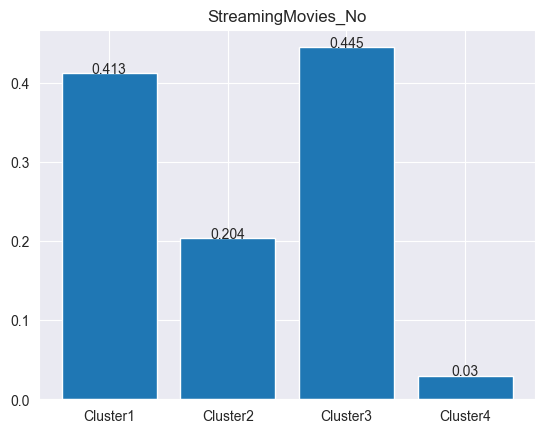

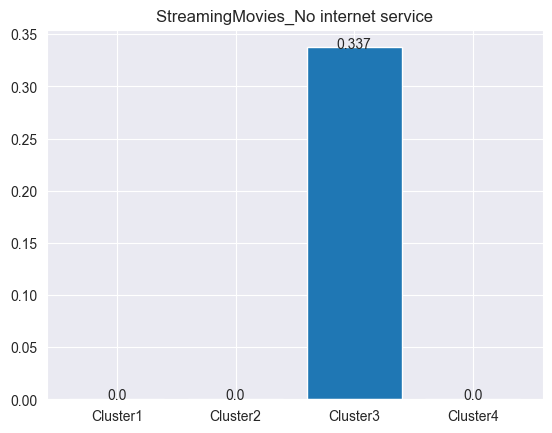

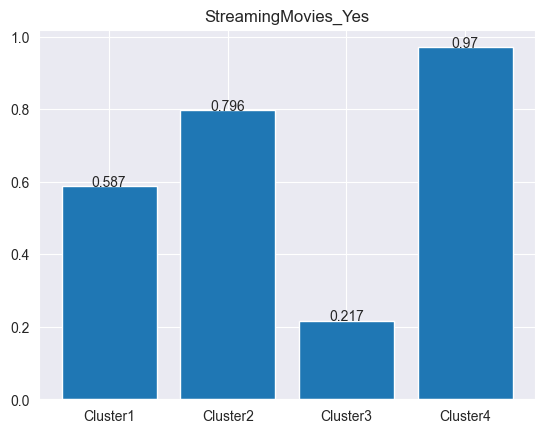

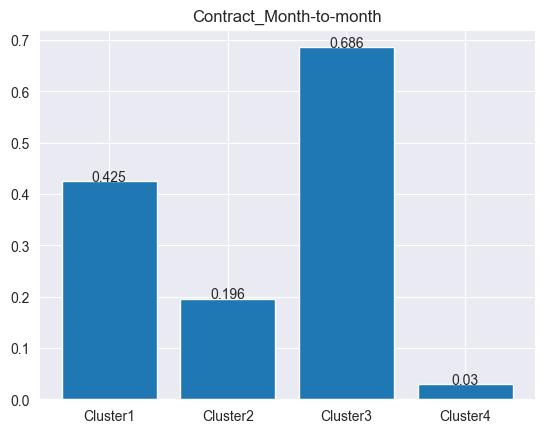

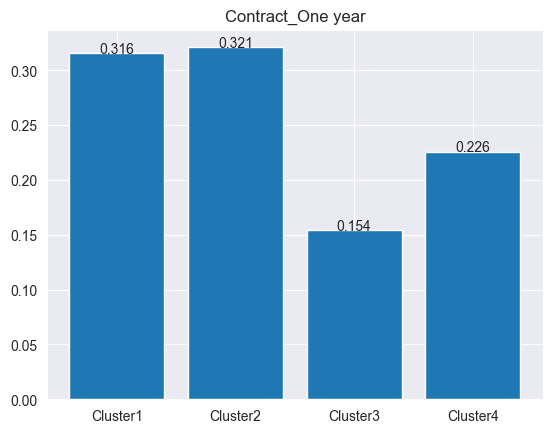

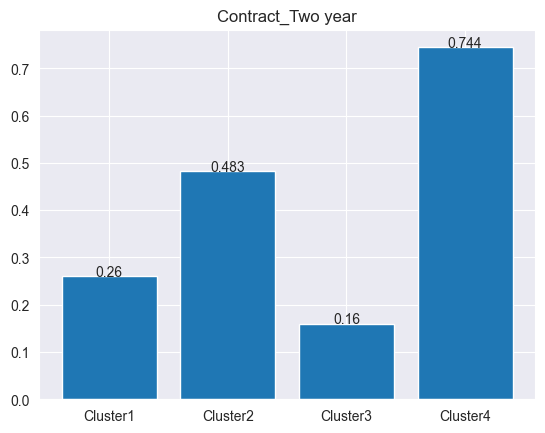

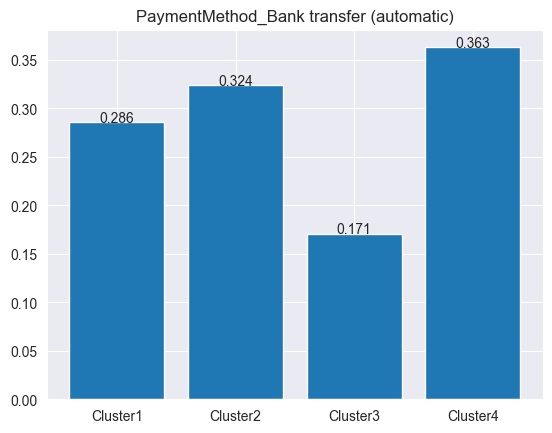

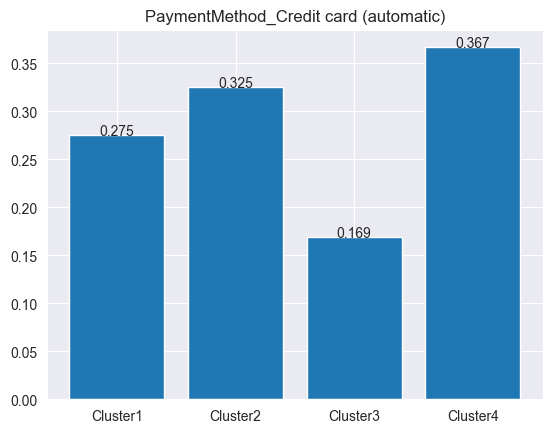

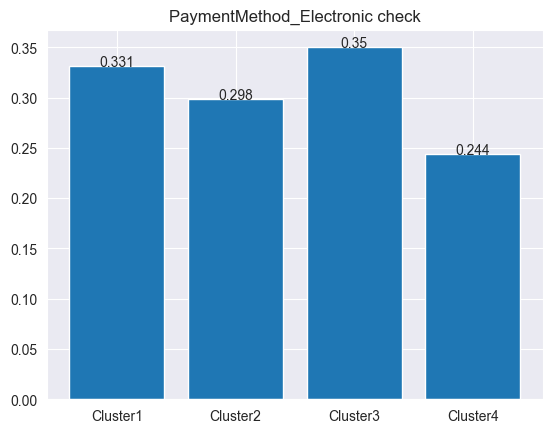

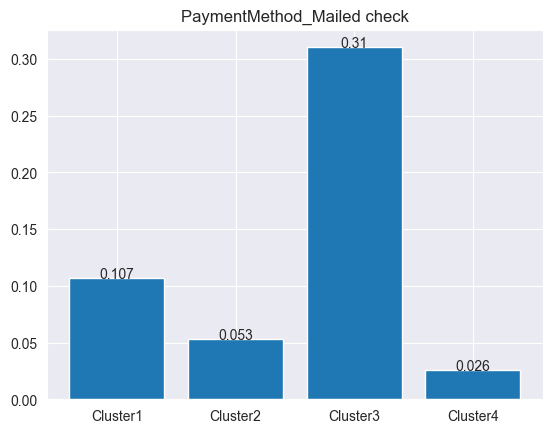

In [19]:
import csv

def addlabels(x,y):
    for a in range(len(x)):
        plt.text(a, round(y[a], 3), round(y[a], 3), ha ='center')

cluster_numbers = ["Cluster1", "Cluster2", "Cluster3", "Cluster4"]
        
with open('Processed_dataset.csv', 'r') as f:
    dict_reader = csv.DictReader(f)
    headers = dict_reader.fieldnames
    
    for header in headers:
        cluster1Value = 0
        for value in cluster1:
            clusterValue = dataset[header][value]
            cluster1Value = cluster1Value + clusterValue
        cluster1Value = cluster1Value / len(cluster1)
        
        cluster2Value = 0
        for value in cluster_2:
            clusterValue = dataset[header][value]
            cluster2Value = cluster2Value + clusterValue
        cluster2Value = cluster2Value / len(cluster_2)
        
        cluster3Value = 0
        for value in cluster_3:
            clusterValue = dataset[header][value]
            cluster3Value = cluster3Value + clusterValue
        cluster3Value = cluster3Value / len(cluster_3)
        
        cluster4Value = 0
        for value in cluster_4:
            clusterValue = dataset[header][value]
            cluster4Value = cluster4Value + clusterValue
        cluster4Value = cluster4Value / len(cluster_4)
                
        values = [cluster1Value, cluster2Value, cluster3Value, cluster4Value]
        plt.bar(cluster_numbers, values)
        plt.title(header)
        addlabels(cluster_numbers, values)
        plt.show()

### Gender Calculation

In [20]:
untouchedDataset = pd.read_csv("dataset.csv")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i],3), ha = 'center')
def addlabels_2(x,y,width):
    for i in range(len(x)):
        plt.text(i+width, y[i], round(y[i],3), ha = 'center')

In [21]:
def parser(header, label1, label2, yLabel, yesLabelText, noLabelText):
    cluster1Yes, cluster2Yes, cluster3Yes, cluster4Yes = 0, 0, 0, 0
    cluster1No, cluster2No, cluster3No, cluster4No = 0, 0, 0, 0
    
    for value in cluster1:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster1Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster1No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)
    
    for value in cluster_2:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster2Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster2No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)
    
    for value in cluster_3:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster3Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster3No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)
            
    for value in cluster_4:
        clusterValue = untouchedDataset[header][value]
        if clusterValue == label1:
            cluster4Yes += 1
        elif clusterValue == label2 or clusterValue == "No internet service":
            cluster4No += 1
        else:
            print("Outliars in: " + header + " Value: " + clusterValue)
            
    plt.title(header)
    values1 = [cluster1Yes, cluster2Yes, cluster3Yes, cluster4Yes]
    values2 = [cluster1No, cluster2No, cluster3No, cluster4No]
    
    
    x = np.arange(len(cluster_numbers))
    
    width = 0.35
    
    bar1 =  plt.bar(x - width/2, values1, width = width,  edgecolor = 'black', label = yesLabelText)
    bar2 = plt.bar(x + width/2, values2, width=width, edgecolor = 'black', label = noLabelText)
    
    for bar in bar1:
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')

    for bar in bar2:
        plt.text(bar.get_x() + bar.get_width()/2 + 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')
    
    
    n= 4
    r = np.arange(n) 
    plt.xticks(r + width/2,cluster_numbers) 

    plt.legend() 

    plt.ylabel(yLabel)
    plt.show()

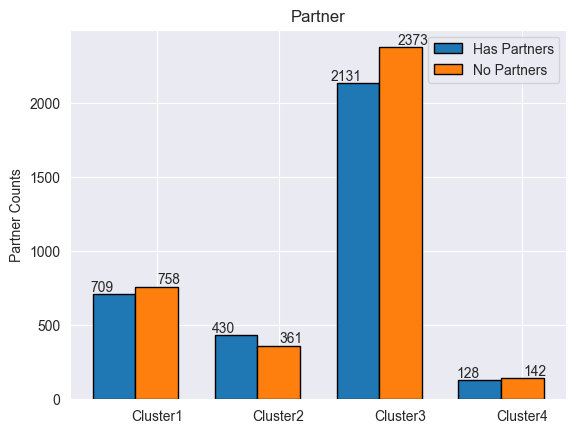

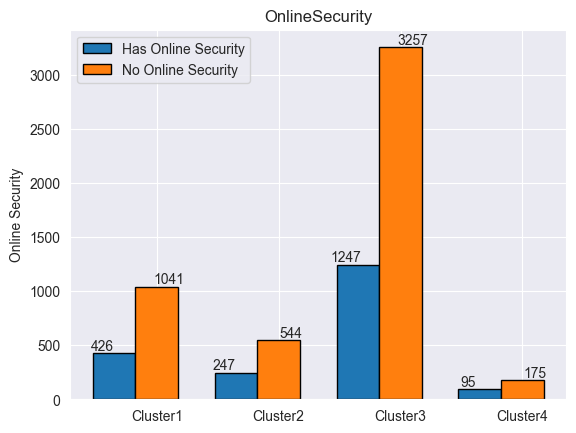

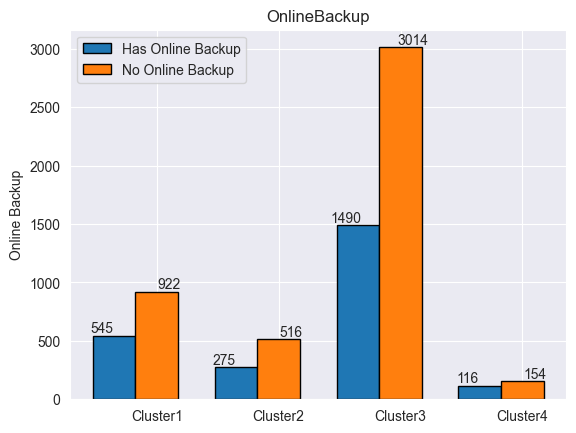

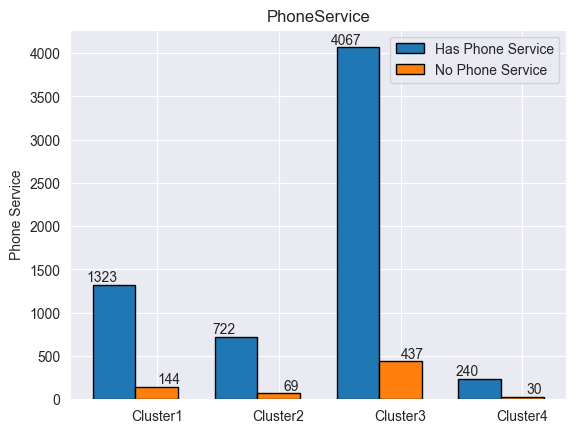

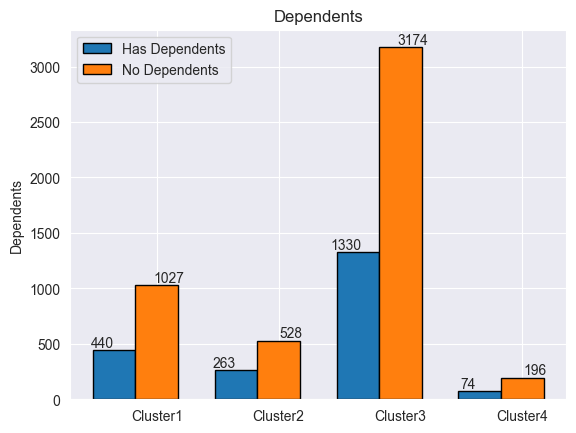

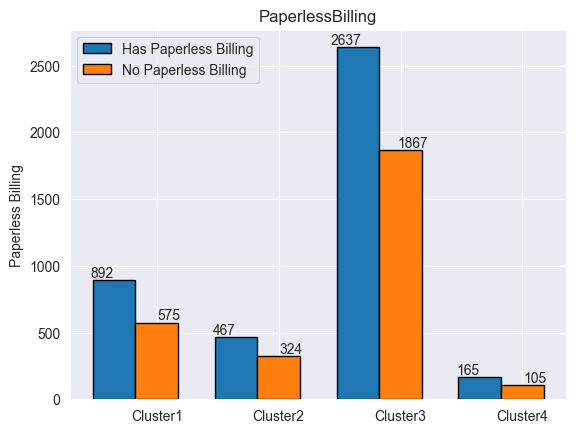

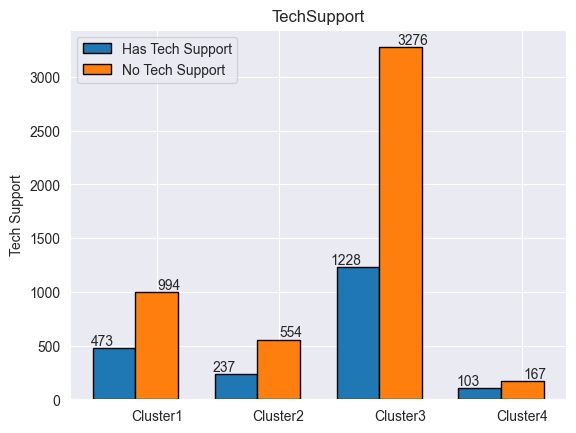

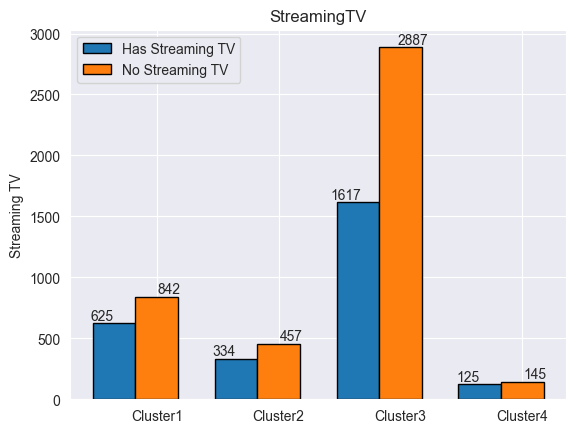

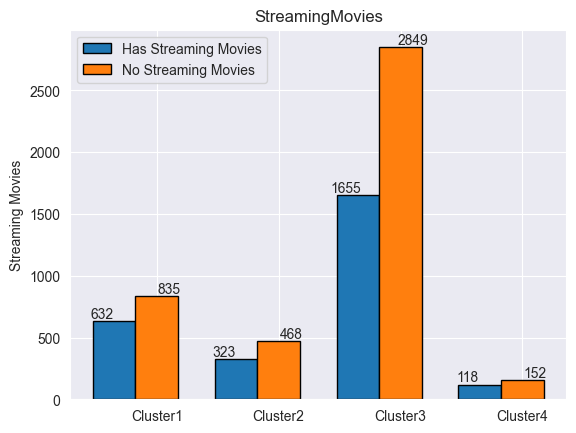

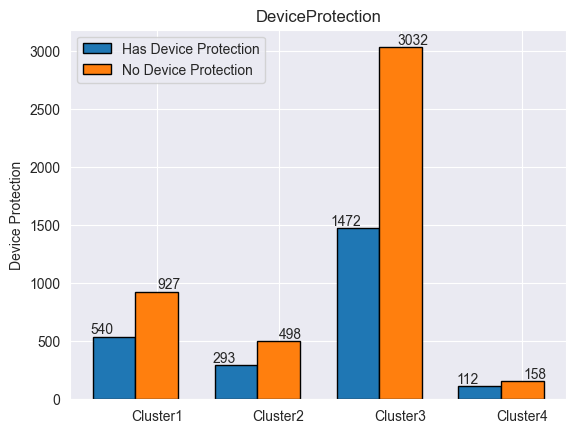

In [22]:
parser("Partner", "Yes", "No", "Partner Counts", "Has Partners", "No Partners")
parser("OnlineSecurity", "Yes", "No", "Online Security", "Has Online Security", "No Online Security")
parser("OnlineBackup", "Yes", "No", "Online Backup", "Has Online Backup", "No Online Backup")
parser("PhoneService", "Yes", "No", "Phone Service", "Has Phone Service", "No Phone Service")
parser("Dependents", "Yes", "No", "Dependents", "Has Dependents", "No Dependents")
parser("PaperlessBilling", "Yes", "No", "Paperless Billing", "Has Paperless Billing", "No Paperless Billing")
parser("TechSupport", "Yes", "No", "Tech Support", "Has Tech Support", "No Tech Support")
parser("StreamingTV", "Yes", "No", "Streaming TV", "Has Streaming TV", "No Streaming TV")
parser("StreamingMovies", "Yes", "No", "Streaming Movies", "Has Streaming Movies", "No Streaming Movies")
parser("DeviceProtection", "Yes", "No", "Device Protection", "Has Device Protection", "No Device Protection")

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

def parser2(header, yesLabelText, noLabelText):
        # Group by gender and SeniorCitizen, then count the number of customers
    senior_count = untouchedDataset.groupby(['gender', header]).size().reset_index(name='count')
    for value in senior_count["count"]:
        print(value)
    # Plot the results
    plt.title(header + " With Genders")
    values1 = [senior_count["count"][0], senior_count["count"][2]]
    values2 = [senior_count["count"][1], senior_count["count"][3]]
    
    
    x = np.arange(len(values2))
    plt.ylim(-2, 4000)
    width = 0.35
    
    bar1 =  plt.bar(x - width/2, values1, width = width,  edgecolor = 'black', label = yesLabelText)
    bar2 = plt.bar(x + width/2, values2, width=width, edgecolor = 'black', label = noLabelText)
    
    for bar in bar1:
        plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')
    
    for bar in bar2:
        plt.text(bar.get_x() + bar.get_width()/2 + 0.1, bar.get_height() + 0.1, str(bar.get_height()), ha='center', va='bottom')
    plt.xlabel('')
    plt.ylabel(header)
    plt.title(header + ' Counts by Gender')
    n= 4
    r = np.arange(n) 
    plt.legend() 
    plt.show()

2920
568
2981
574


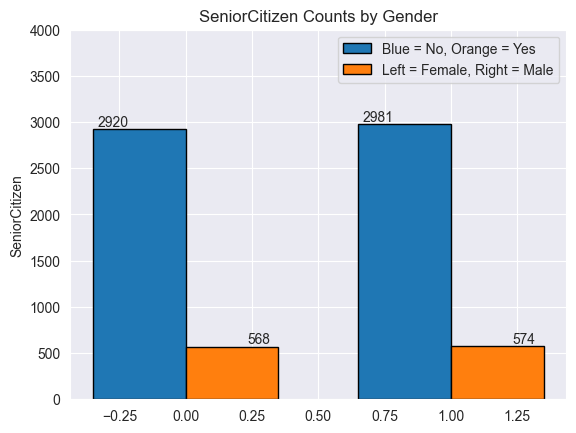

1800
1688
1841
1714


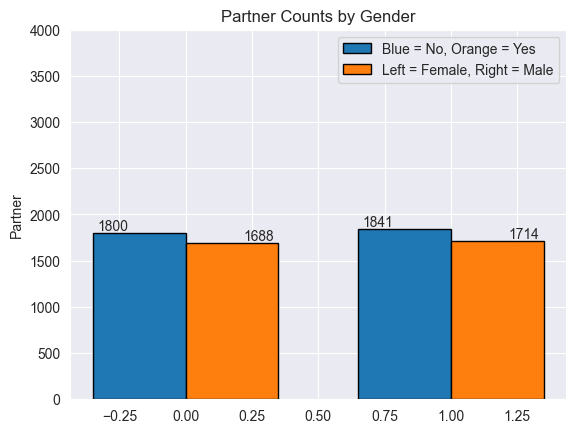

1714
747
1027
1784
779
992


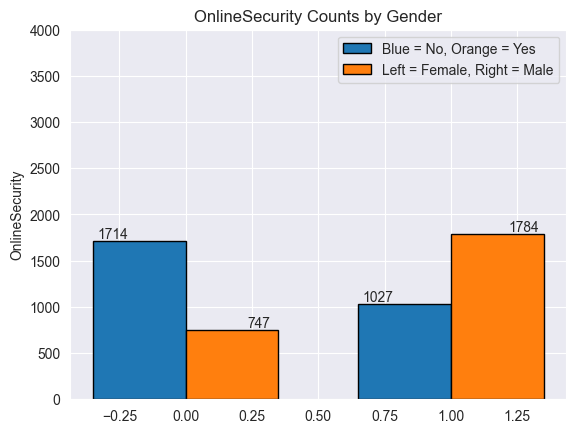

1515
747
1226
1573
779
1203


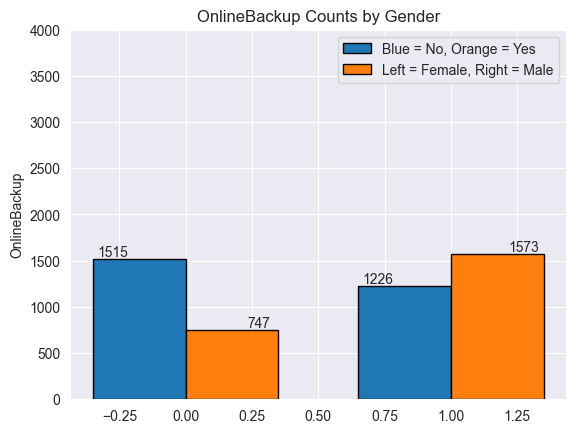

331
3157
351
3204


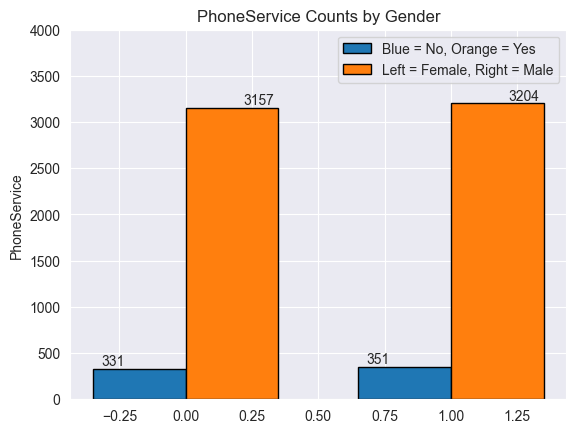

2460
1028
2473
1082


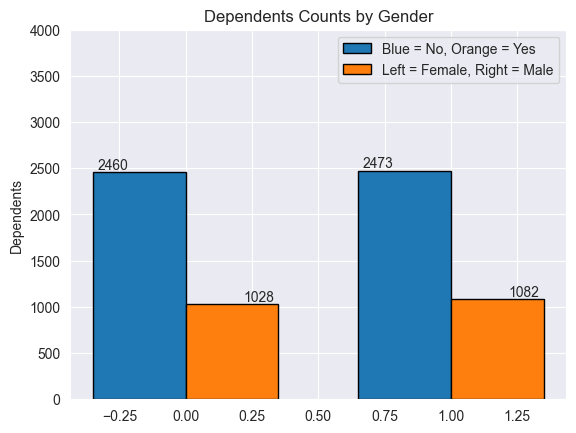

1402
2086
1470
2085


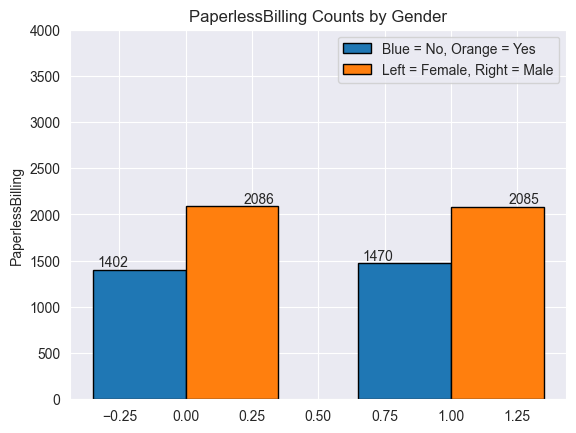

1714
747
1027
1759
779
1017


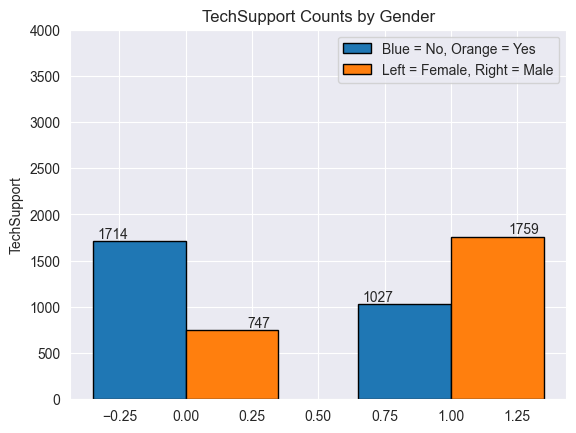

1386
747
1355
1424
779
1352


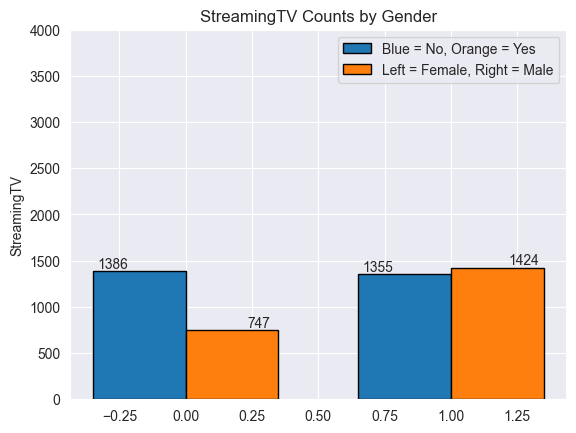

1370
747
1371
1415
779
1361


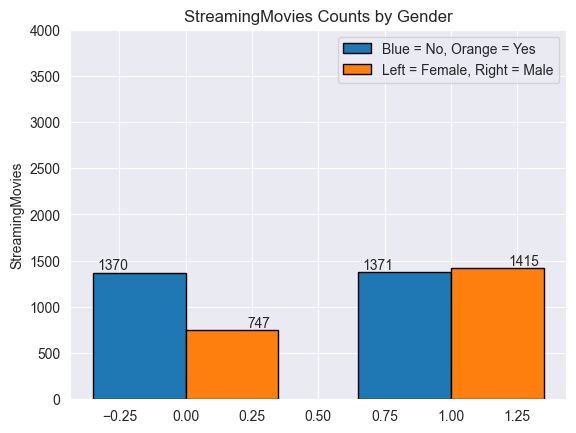

1538
747
1203
1557
779
1219


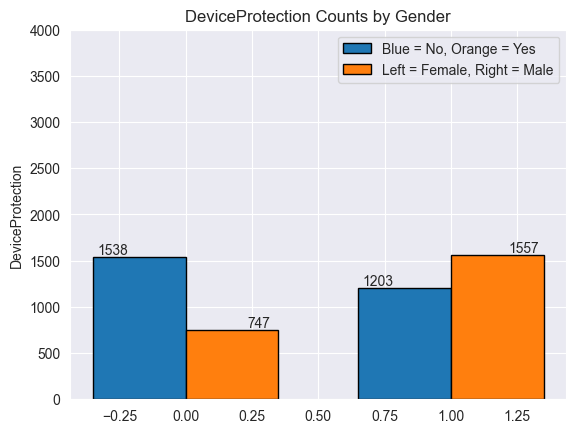

In [106]:
parser2("SeniorCitizen", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("Partner", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("OnlineSecurity", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("OnlineBackup", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("PhoneService", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("Dependents", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("PaperlessBilling", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("TechSupport", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("StreamingTV", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("StreamingMovies", "Blue = No, Orange = Yes", "Left = Female, Right = Male")
parser2("DeviceProtection", "Blue = No, Orange = Yes", "Left = Female, Right = Male")